In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [4]:
from google.colab import files
uploaded = files.upload()

Saving olivetti_faces.npy to olivetti_faces (1).npy


In [5]:
from google.colab import files
uploaded = files.upload()

Saving olivetti_faces_target.npy to olivetti_faces_target (1).npy


In [0]:
data = np.load("olivetti_faces.npy")
target = np.load("olivetti_faces_target.npy")

In [0]:
import matplotlib.pyplot as plt

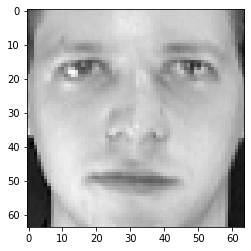

In [8]:
plt.imshow(data[0], cmap = 'gray')
plt.show()

In [11]:
print(np.unique(target))
print(len(np.unique(target)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
40


In [0]:
def show_40_unique_image(images, ids):
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    axarr=axarr.flatten()

    for unique_id in ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

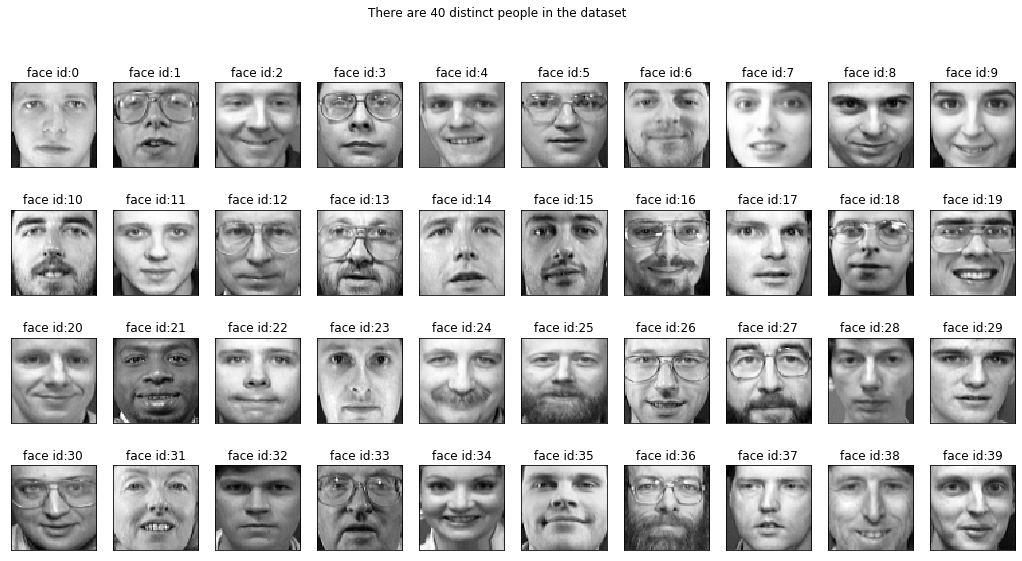

In [13]:
show_40_unique_image(data, np.unique(target))

In [14]:
print(data.shape)
print(target.shape)

(400, 64, 64)
(400,)


In [0]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data, target, test_size = 0.2, random_state = 7)

In [16]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(320, 64, 64)
(320,)
(80, 64, 64)
(80,)


In [0]:
x_re_train = train_x.reshape(-1, 64, 64, 1)
x_re_test = test_x.reshape(-1, 64, 64, 1)

In [18]:
x_re_train.shape

(320, 64, 64, 1)

In [19]:
x_re_train[32].shape

(64, 64, 1)

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(20, (5,5), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(50, (6,6), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(150, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(40, activation='softmax')
])

In [0]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [0]:
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.7, 
                                            min_lr=0.00000000001)

In [0]:
epoch = 37
batch_size = 20

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.05, # Randomly zoom image 
        width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_re_train)

In [24]:
from keras.utils.np_utils import to_categorical

y_train_ = to_categorical(train_y, num_classes = 40)
y_test_ = to_categorical(test_y, num_classes = 40)

Using TensorFlow backend.


In [25]:
history = model.fit_generator(
                              datagen.flow(x_re_train,y_train_, batch_size=batch_size),
                              epochs = epoch, 
                              validation_data = (x_re_test,y_test_),
                              verbose = 2, 
                              steps_per_epoch=x_re_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction]
                             )

Epoch 1/37
16/16 - 5s - loss: 3.7313 - accuracy: 0.0094 - val_loss: 3.6926 - val_accuracy: 0.0125
Epoch 2/37
16/16 - 5s - loss: 3.6912 - accuracy: 0.0312 - val_loss: 3.6954 - val_accuracy: 0.0375
Epoch 3/37
16/16 - 5s - loss: 3.6937 - accuracy: 0.0281 - val_loss: 3.7040 - val_accuracy: 0.0000e+00
Epoch 4/37
16/16 - 5s - loss: 3.6972 - accuracy: 0.0250 - val_loss: 3.7010 - val_accuracy: 0.0000e+00
Epoch 5/37
16/16 - 5s - loss: 3.6736 - accuracy: 0.0375 - val_loss: 3.6901 - val_accuracy: 0.0750
Epoch 6/37
16/16 - 5s - loss: 3.5227 - accuracy: 0.1031 - val_loss: 3.4159 - val_accuracy: 0.1125
Epoch 7/37
16/16 - 5s - loss: 3.0483 - accuracy: 0.1469 - val_loss: 2.7410 - val_accuracy: 0.2000
Epoch 8/37
16/16 - 5s - loss: 2.1680 - accuracy: 0.4125 - val_loss: 2.0839 - val_accuracy: 0.4375
Epoch 9/37
16/16 - 5s - loss: 1.7050 - accuracy: 0.5500 - val_loss: 1.7131 - val_accuracy: 0.5000
Epoch 10/37
16/16 - 5s - loss: 1.2115 - accuracy: 0.6687 - val_loss: 2.3830 - val_accuracy: 0.3500
Epoch 11/37

In [0]:
y_pred = model.predict_classes(x_re_test)

In [27]:
y_pred

array([26,  6, 12, 13, 39,  2, 28, 11, 28, 16,  5, 27, 15, 34, 22, 39, 11,
        5, 32, 30,  5, 13, 39, 39,  3, 29, 25, 19, 23, 15, 22,  1, 24, 35,
        6, 36,  5, 20, 23,  8, 18, 17, 24, 30, 10, 36, 12, 23,  2,  4,  0,
        2, 15, 37, 21, 21, 27, 11, 39,  8, 14, 36, 36, 33,  9, 33, 33, 23,
       33, 29, 38, 14, 17, 23, 37, 22,  5, 25,  7,  7])

In [0]:
test_y = test_y.reshape(-1,)

In [29]:
test_y

array([26,  6, 12, 13, 37,  2, 28, 11, 28, 16,  5, 27, 15, 34, 22, 39, 11,
        5, 32, 30,  5, 13, 39, 39,  3, 29, 25, 19, 23, 15, 22,  1, 24, 35,
        6, 36,  5, 20, 23,  8, 18, 17, 24, 30, 10, 36, 12, 23,  2,  4,  0,
        2, 15, 37, 21, 21, 26, 11, 39,  8, 14, 36, 36, 33,  9, 33, 33, 23,
       33, 29, 38, 14, 17, 23, 37, 22,  5, 36,  7,  7], dtype=int32)

In [0]:
diff = test_y - y_pred

In [31]:
acc = 0

for i in diff:
    if i == 0:
        acc = acc + 1

print(acc)

acc = (acc/len(diff)) * 100
print(acc)

77
96.25


In [0]:
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
acc = history.history['accuracy']
loss = history.history['loss']

In [0]:
val_accuracy = []
val_losses = []
accuracy = []
losses = []
num_of_epochs = []
for i in range(1,epoch,4):
    accuracy.append(round(100*acc[i],3))
    val_accuracy.append(round(100*val_acc[i],3))
    losses.append(round(100*loss[i],3))
    val_losses.append(round(100*val_loss[i],3))
    num_of_epochs.append(i)

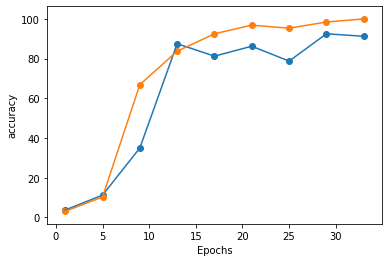

In [35]:
plt.scatter(num_of_epochs,val_accuracy)
plt.plot(num_of_epochs,val_accuracy)
plt.scatter(num_of_epochs,accuracy)
plt.plot(num_of_epochs,accuracy)
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.show()

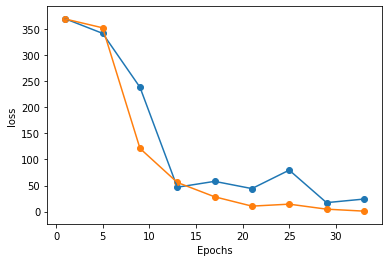

In [36]:
plt.scatter(num_of_epochs,val_losses)
plt.plot(num_of_epochs,val_losses)
plt.scatter(num_of_epochs,losses)
plt.plot(num_of_epochs,losses)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

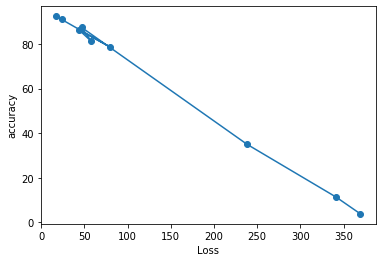

In [37]:
plt.scatter(val_losses,val_accuracy)
plt.plot(val_losses,val_accuracy)
plt.xlabel("Loss")
plt.ylabel("accuracy")
plt.show()